7. Multi-variable Calculus
===
[13.1 Functions of Several Variables](6%20Multi-variable%20Calculus-Differentiation-1.ipynb#Functions-of-Several-Variables)<br>
[13.2 Limits and Continuuity](6%20Multi-variable%20Calculus-Differentiation-1.ipynb#Limit-and-Continuity)<br>
[13.3 Partial Differentiation](#Partial-Differentiation)<br>
[13.4 Chain Rule](#Chain-Rule)<br>
[13.5 Tangent Plane](#Tangent-Plane)<br>
[13.6 Relative Extrema](6%20Multi-variable%20Calculus-Differentiation-3.ipynb#Relative-Maxima-and-Minima)<br>
[13.7 Lagrange Multiplier](6%20Multi-variable%20Calculus-Differentiation-3.ipynb#Optimization-Problem-with-Constraints)
[13.8 Method of Least Squares](6%20Multi-variable%20Calculus-Differentiation-3.ipynb#The-Method-of-Least-Squares)

In [1]:
%matplotlib inline

#rcParams['figure.figsize'] = (10,3) #wide graphs by default
import scipy
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output,display
import matplotlib.pylab as plt

Partial Differentiation
---
Definition
---
  Suppose that $(x_0, y_0)$ is in the domain of $z = f (x, y)$
**1.** the partial derivative with respect to $x$ at $(x_0, y_0)$ is the
    limit

$$ \frac{\partial f}{\partial x} (x_0, y_0) = \lim_{h \rightarrow 0}
       \frac{f (x_0 + h, y_0) - f (x_0, y_0)}{h} $$

Geometrically, the value of this limit is the slope of the tangent line of
    $z = f (x, y)$ in the plane $y = y_0$. And this quantity is the rate of
    change of $f (x, y)$ at $(x_0, y_0)$ along the $x$-direction.

**2.** the partial derivative with respect to $y$ at $(x_0, y_0)$ is the
    limit

$$ \frac{\partial f}{\partial y} (x_0, y_0) = \lim_{k \rightarrow 0}
       \frac{f (x_0, y_0 + k) - f (x_0, y_0)}{k} $$

Geometrically, the value of this limit is the slope of the tangent line of
    $z = f (x, y)$ in the plane $x = x_0$. And this quantity is the rate of
    change of $f (x, y)$ at $(x_0, y_0)$ along the $y$-direction. 

Here is a geometric meaning about partial derivative:

<img src="imgs/8/cal7-11.png" width=80% />
  



The same definition can be also applied to the functions with more than two
variables.

Definition
---
  Suppose that $(x^i_0) = (x_0^1, x_0^2, \cdots, x_0^n)$ in the domain of $f
  (\mathbf{x}) = f (x^1, x^2, \cdots, x^n)$. The partial derivative \ with
  respect to $x^i$ at $(x^i_0)$ is defined as
  $$ f_i = \frac{\partial f}{\partial x^i} = \lim_{k \rightarrow 0} \frac{f
     (x_0^1, \cdots, x_0^{i - 1}, x_0^i + k, x_0^{i + 1}, \cdots, x_0^n) - f
     (x_0^1, x_0^2, \cdots, x_0^n)}{k} $$


Definition
---
  $(f_1, \cdots, f_n)$ is called gradient of $f (\vec{x})$, denoted as $\nabla
  f$.



Example
---

  Find the $\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y},
  \frac{\partial f}{\partial x} (1, 3), \frac{\partial f}{\partial y} (2, -
  4)$ if $f (x, y) = x^3 + 4 x^2 y^3 + y^2$.

In [1]:
from sympy import symbols, diff,pprint,sqrt
x,y=symbols('x y')
f=x**3+4*x*x*y**3+y*y

grad = lambda func, vars :[diff(func,var) for var in vars]

df=grad(f,[x,y])
pprint(df)
        

⎡   2        3      2  2      ⎤
⎣3⋅x  + 8⋅x⋅y , 12⋅x ⋅y  + 2⋅y⎦


In [2]:
def df_val(f,val):
    return [ff.subs({x:val[0],y:val[1]}) for ff in f]
df_val(df,[1,3])

[219, 114]

In [3]:
df_val(df,[2,-4])

[-1012, 760]

Example
---

  Find the $\frac{\partial f}{\partial x}$ if $f (x, y) = x^3 + 4 x^2 y^3 + y^2$.

In [5]:
f=2*x**2*y**3-3*x*y**2+2*x**2+3*y*y*1

grad = lambda func, vars :[diff(func,var) for var in vars]

df=grad(f,[x,y])
pprint(df)
        

⎡     3            2     2  2              ⎤
⎣4⋅x⋅y  + 4⋅x - 3⋅y , 6⋅x ⋅y  - 6⋅x⋅y + 6⋅y⎦


Example
---

  Find the $\frac{\partial f}{\partial x}$ if $f (x, y) = x \cos xy^2$.

In [6]:
from sympy import cos
f=x*cos(x*y**2)

grad = lambda func, vars :[diff(func,var) for var in vars]

df=grad(f,[x,y])
pprint(df)
        

⎡     2    ⎛   2⎞      ⎛   2⎞      2      ⎛   2⎞⎤
⎣- x⋅y ⋅sin⎝x⋅y ⎠ + cos⎝x⋅y ⎠, -2⋅x ⋅y⋅sin⎝x⋅y ⎠⎦


Example
---
  Find all the first partial derivatives of Cobb-Douglas function with $n$
  inputs,
  $$ f (x_1, \cdots, x_n) = A x_1^{\alpha_1} \cdots x_n^{\alpha_n}
     \text{ where } A > 0, 0 < \alpha_1, \cdots \alpha_n < 1 $$
  Sol:

\begin{eqnarray*}
      \frac{\partial f}{\partial x_i} & = & A x_1^{\alpha_1} \cdots x_{i -
      1}^{\alpha_{i - 1}}  \color{brown}{\alpha_i x_i^{\alpha_i - 1}} x_{i +
      1}^{\alpha_{i + 1}} \cdots x_n^{\alpha_n}\\
      & = & A \alpha_i x_1^{\alpha_1} \cdots x_{i - 1}^{\alpha_{i - 1}}
      x_i^{\alpha_i} x_{i + 1}^{\alpha_{i + 1}} \cdots x_n^{\alpha_n} / x_i\\
      & = & \alpha_i \frac{f (x_1, \cdots, x_n)}{x_i} \text{for} i = 1,
      \cdots, n
    \end{eqnarray*}


Eexample
---
  A factory produces two kinds of machine parts, says A and B. If the totally
  daily cost function of production of $x$ hundred units of A and $y$ hundred
  units of B is: 
  $$ C (x, y) = 200 + 10 x + 20 y - \sqrt{x + y} $$

In [13]:
C = 200+10*x+20*y-sqrt(x+y)
Cxy=grad(C,[x,y])
df_val(Cxy,[5,6])

[-sqrt(11)/22 + 10, -sqrt(11)/22 + 20]

 $\frac{\partial C}{\partial x} (5, 6) = 10 - \frac{1}{22} \sqrt{11}$,i.e.
  an increase for $x$ from 5 to 6 while y kept at 6 will result in an increase
  in daily cost function approximately $9.85$. And
  $\frac{\partial C}{\partial y} (5, 6) = 20 - \sqrt{11} /
  22$, i.e. an increase for $y$ from 6 to 7 while $x$ kept at 5 will result in
  an increase in daily cost function approximately $19.85$.
  

Example
---
  If $f (x, y) = x^2 e^{y^3} + \sqrt{2 x + 3 y}$, $\frac{\partial f}{\partial
  x} = 2 x e^{y^3} + (2 x + 3 y)^{- 1 / 2}$ and $\frac{\partial f}{\partial y}
  = 3 x^2 y^2 e^{y^3} + \frac{3}{2} (2 x + 3 y)^{- 1 / 2}$
  
Solution
---
  
Since the partial differentiation only works for the defaulted variables, in
other words, the left variables are treated as constants in such operation. Therefore

\begin{eqnarray*}
    \frac{\partial}{\partial x} \left( x^2 e^{y^3} + \sqrt{2 x + 3 y} \right)
    & = & e^{y^3} \frac{\partial}{\partial x} x^2 + \frac{\partial}{\partial
    x} \sqrt{2 x + 3 y}\\
    & = & e^{y^3} \cdot 2 x + 2 \cdot \frac{1}{2 \sqrt{2 x + 3 y}}\\
    & = & 2 x e^{y^3} + \frac{1}{\sqrt{2 x + 3 y}}
  \end{eqnarray*}
  Note that the last result comes from the {\tmstrong{Chain Rule}} as follows:
  
<img src="imgs/8/cal7-12.png" width=80% />

As the same reason, we also have the result for partial derivative with
  respect to $y$:

\begin{eqnarray*}
    \frac{\partial}{\partial y} \left( x^2 e^{y^3} + \sqrt{2 x + 3 y} \right)
    & = & x^2 \frac{\partial}{\partial y} e^{y^3} + \frac{\partial}{\partial
    y} \sqrt{2 x + 3 y}\\
    & = & 3 x^2 y^2 e^{y^3} + \frac{3}{2 \sqrt{2 x + 3 y}}
  \end{eqnarray*}  
  

Example
---
Find out the first order derivatives for $f (x, y) = x \sqrt{y} - y
  \sqrt{x}$.

In [19]:
f=x*sqrt(y)-y*sqrt(x)
grad(f,[x,y])

[sqrt(y) - y/(2*sqrt(x)), -sqrt(x) + x/(2*sqrt(y))]

Example
---

  For Cobb-Douglas production function, $f (K, L) = 20 K^{1 / 4} L^{3 / 4}$
1. **The marginal productivity of capital** when $K = 16$ and $L =81$ is 
$\frac{\partial f}{\partial K} (16, 81) = \frac{135}{8},$ i.e. an
    increase in $K$ from 16 to 17 will result in an increase of approximately
    ${\frac{135}{8}}$ units of productions.
- **The marginal productivity of labor** when $K = 16$ and $L =
    81$ is $\frac{\partial f}{\partial L} (16, 81) = 10,$ i.e. an increase in
    $L$ from 81 to 82 will result in an increase of approximately 10 units of
    productions.

**Description**
  
Note the partial derivatives are as follows:

\begin{eqnarray*}
    \frac{\partial f}{\partial K} & = & 5 \left( \frac{L}{K} \right)^{3 / 4}\\
    \frac{\partial f}{\partial L} & = & 15 \left( \frac{K}{L} \right)^{1 / 4}
  \end{eqnarray*}


Two products are said to be **competitive** with each other if an
increase in demand for one results in a decrease in demand for the other.
**Complementary** products have just the opposite relation to each other.
Suppose that $f (p, q)$ and $g (p, q)$ are the demand for products, $A$ and
$B$, at respective price $p$ and $q$. We have

1. $\frac{\partial f}{\partial p} < 0$ and $\frac{\partial g}{\partial q}
  < 0$ sine raising price always results in a decrease in demand.
- If $\frac{\partial f}{\partial q} > 0$ and $\frac{\partial g}{\partial
  p} > 0$ Then $A$ and $B$ are in **competitive** case at price level
  $(p, q)$.
- If $\frac{\partial f}{\partial q} < 0$ and $\frac{\partial g}{\partial
  p} < 0$ Then $A$ and $B$ are in **complementary** case at price level
  $(p, q)$.


Example
---

If $f (p, q) = 400 - 5 p^2 + 16 q$ and $g (p, q) = 600 + 12 p - 4 q^2$, then
  $A$ and $B$ are competitive since

\begin{eqnarray*}
    \frac{\partial f}{\partial q} & = & 16 > 0\\
    \frac{\partial g}{\partial p} & = & 12 > 0
\end{eqnarray*}

Example
---
If $f (p, q) = \frac{30 p}{2 p + 3 q}$ and $g (p, q) = \frac{10 q}{p + 4
    q}$, then $A$ and $B$ are complementary since

\begin{eqnarray*}
      \frac{\partial f}{\partial q} & = & \frac{\partial}{\partial q} 
      \frac{30 p}{2 p + 3 q}\\
      & = & \frac{- 90 p}{(2 p + 3 q)^2} < 0\\
      \frac{\partial g}{\partial p} & = & \frac{\partial}{\partial p} 
      \frac{10 q}{p + 4 q}\\
      & = & \frac{- 10 q}{(p + 4 q)^2} < 0
\end{eqnarray*}


Implicit Differentiation
---
Suppose that $z$ is differentiable and defined implicitly as follows:
$$ x^2+y^3-z+2yz^2=5.$$


In [9]:
from sympy import Function,solve
x,y  = symbols('x y')
z = Function('z')(x,y)


In [12]:
eq= x**2+y**3-z+2*y*z**2-5
gradv=grad(eq,[x,y])
gradv

[2*x + 4*y*z(x, y)*Derivative(z(x, y), x) - Derivative(z(x, y), x),
 3*y**2 + 4*y*z(x, y)*Derivative(z(x, y), y) + 2*z(x, y)**2 - Derivative(z(x, y), y)]

In [17]:
pprint("dz/dx = %s" %solve(gradv[0],diff(z, x))[0])

dz/dx = -2*x/(4*y*z(x, y) - 1)


In [22]:
pprint("dz/dy = %s" %solve(gradv[1],diff(z, y))[0])

dz/dy = -(3*y**2 + 2*z(x, y)**2)/(4*y*z(x, y) - 1)


Example
---
**a).** If $f(x,y,z)=x^2y+y^2z+zx$, then $f_x=2xy+z$;<br>
**b).** If $h(x,y,zw)=\frac{xw^2}{y+\sin zw}$, then $h_w=$


In [24]:
from sympy import sin
x,y,z,w=symbols(" x y z w")
f=x*w**2/(y+sin(z*w))
pprint(diff(f,w))

   2                            
  w ⋅x⋅z⋅cos(w⋅z)      2⋅w⋅x    
- ─────────────── + ────────────
                2   y + sin(w⋅z)
  (y + sin(w⋅z))                


Note
---
  Higher order partial derivative. As the functions of single variable, we can
  define what the higher order partial derivatives of functions with multiple
  variables as follows:

1. Two variables: Suppose that $f (x, y)$ is smooth enough,
 
**Partial derivatives for $f (x, y)$**

|Order |Partial Derivatives|
|---|---|
| 1st |$f_1 = \frac{\partial f}{\partial x}, f_2 = \frac{\partial f}{\partial y}$|
| 2nd | $f_{ij} = \frac{\partial^2f}{\partial x^j\partial x^i}$|
|More | $f_{\cdots i} = \frac{\partial f_{\cdots}}{\partial x^i} $|

**2.** More than two variables: Suppose that $f (\vec{x}) = f (x^1,
    \cdots, x^n)  \color{brown}{\text{ (or denoted as } f
    (x^i))}$ is smooth enough,
    
|Order | partial derivatives |
|---|---|
|1st | $f_i = \frac{\partial f}{\partial x^i}$,  for $i = 1, \cdots,n$ |
|2nd | $f_{i j} = \frac{\partial^2f}{\partial x^i\partial x^j},$ for $1 \leqslant i, j \le n$ |
|More | $f_{\color{red}{\cdots} i} = \frac{\partial}{\partial x^i}f_{\color{red}{\cdots}}$,  for $i = 1, \cdots, n$ |





Example
---
  Find the second order derivatives of $f (x, y) = x^2 y^3 + e^{4 x} \ln y$.
  
  All the 1st order partial derivatives are as follows:

\begin{eqnarray*}
    \frac{\partial f}{\partial x} = 2 x \cdot y^3 + 4 e^{4 x} \cdot \ln y &
    \text{and} & \frac{\partial f}{\partial y} = x^2 \cdot 3 y^2 + e^{4 x}
    \cdot \frac{1}{y}
  \end{eqnarray*}
  And all the 2nd order of partial derivatives are as follows:

\begin{eqnarray*}
    \frac{\partial^2 f}{\partial x^2} & = & \frac{\partial}{\partial x} (2 x
    y^3 + 4 e^{4 x} \ln y)\\
    & = & 2 \cdot y^3 + 16 e^{4 x} \cdot \ln y\\
    \frac{\partial^2 f}{\partial y^2} & = & \frac{\partial}{\partial y} \left(
    3 x^2 y^2 + e^{4 x} \frac{1}{y} \right)\\
    & = & 6 x^2 y - e^{4 x} \frac{1}{y^2}\\
    \frac{\partial^2 f}{\partial y \partial x} & = & \frac{\partial}{\partial
    y} (2 x y^3 + 4 e^{4 x} \ln y)\\
    & = & 2 x \cdot 3 y^2 + 4 e^{4 x} \cdot \frac{1}{y}\\
    \frac{\partial^2 f}{\partial x \partial y} & = & 6 x y^2 + 4 e^{4 x} / y
  \end{eqnarray*}

In [15]:
from sympy import exp,log

f=x*x*y**3+exp(4*x)*log(y)
X=[x,y]
g=grad(f,X)
g

[2*x*y**3 + 4*exp(4*x)*log(y), 3*x**2*y**2 + exp(4*x)/y]

In [18]:
pprint([[diff(gg,var) for gg in g] for var in X])

⎡⎡                                   4⋅x⎤  ⎡            4⋅x            4⋅x⎤⎤
⎢⎢   3       4⋅x              2   4⋅ℯ   ⎥  ⎢     2   4⋅ℯ        2     ℯ   ⎥⎥
⎢⎢2⋅y  + 16⋅ℯ   ⋅log(y), 6⋅x⋅y  + ──────⎥, ⎢6⋅x⋅y  + ──────, 6⋅x ⋅y - ────⎥⎥
⎢⎣                                  y   ⎦  ⎢           y                2 ⎥⎥
⎣                                          ⎣                           y  ⎦⎦


Example
---
  Find the first three order derivatives of $f (x, y) = 4 x^2 - 6 x y^3$.
  
  All the 1st order partial derivatives are as follows:

\begin{eqnarray*}
    \frac{\partial f}{\partial x} = 8 x - 6 y^3 & \text{and} & \frac{\partial
    f}{\partial y} = 0 - 6 x \cdot 3 y^2
  \end{eqnarray*}
  And the 2nd order of partial derivatives are as follows:

\begin{eqnarray*}
    \frac{\partial^2 f}{\partial x^2} & = & \frac{\partial}{\partial x} (8 x -
    6 y^3)\\
    & = & 8\\
    \frac{\partial^2 f}{\partial y^2} & = & \frac{\partial}{\partial y} (- 18
    x y^2)\\
    & = & - 36 x y\\
    \frac{\partial^2 f}{\partial y \partial x} & = & \frac{\partial}{\partial
    y} (8 x - 6 y^3)\\
    & = & 0 - 12 y^2\\
    \frac{\partial^2 f}{\partial x \partial y} & = & - 12 x y^2
  \end{eqnarray*}
  And 3rd order of partial derivatives are as follows:

\begin{eqnarray*}
    f_{111} & = & \frac{\partial}{\partial x} (8) = 0\\
    f_{222} & = & \frac{\partial}{\partial y} (- 36 x y) = - 36 x\\
    f_{112} = f_{121} = f_{211} & = & \frac{\partial}{\partial y} (8 - 6 y^3)
    = - 18 y^2\\
    f_{122} = f_{212} = f_{221} & = & \frac{\partial}{\partial x} (- 36 x y) =
    - 36 x
  \end{eqnarray*}


In [26]:
f=4*x**2-6*x*y**3
diff(f,x,y)==diff(f,y,x)

True

Theorem
---
  If $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y},
  \frac{\partial^2 f}{\partial x \partial y}$ ,$\frac{\partial^2 f}{\partial y
  \partial x}$ are all continuous near $(x_0, y_0)$, then $\frac{\partial^2
  f}{\partial x \partial y} (x_0, y_0) = \frac{\partial^2 f}{\partial y
  \partial x} (x_0, y_0)$.



Example
---
For $f(x,y,z)=x e^{yz}$, 

In [28]:
from sympy import exp
f=x*exp(y*z)
pprint("fxzy= %s" %diff(f,x,z,y) )

fxzy= (y*z + 1)*exp(y*z)


In [29]:
from sympy import exp
f=x*exp(y*z)
pprint("fyxz= %s" %diff(f,y,x,z) )

fyxz= (y*z + 1)*exp(y*z)


Example
---

Suppose that
$$ f (x, y) = \left\{ \begin{array}{ll}
       \frac{x^3  y - y^3 x}{x^2 + y^2} & \text{ if } (x, y) \neq (0.0) \\
       0 & \text{ if } (x, y) = (0.0)
     \end{array} \right. $$
  
  
  $f (x, y)$ is continuous at $(0, 0)$.

**1.** first partial derivatives of $f (x.y)$ where $(x, y) \neq (0, 0)$:

\begin{eqnarray*}
      \frac{\partial f}{\partial x} & = & \frac{(3 x^2 y + y^3) (x^2 + y^2) -
      2 x (x^3  y + y^3 x)}{(x^2 + y^2)^2}\\
      & = & \frac{- y^5 + 4 x^2 y^3 + x^4 y}{(x^2 + y^2)^2}\\
      \frac{\partial f}{\partial y} & = & \frac{x^5 - 4 y^2 x^3 - y^4 x}{(x^2
      + y^2)^2}
    \end{eqnarray*}


**2.** first partial derivatives of $f (x.y)$ at $(x, y) = (0, 0)$:
    
\begin{eqnarray*}
      \frac{\partial f}{\partial x} (0, 0) & = & \lim_{h \rightarrow 0}
      \frac{f (h, 0) - f (0, 0)}{h}\\
      & = & 0\\
      \frac{\partial f}{\partial x} (0, 0) & = & 0
    \end{eqnarray*}

**3.** Second partial derivatives $\frac{\partial^2 f}{\partial x\partial y}$ and $\frac{\partial^2 f}{\partial y \partial x}$ of $f (x.y)$ where $(x, y) = (0, 0)$:

\begin{eqnarray*}
      \frac{\partial^2 f}{\partial x^{} \partial y} (0, 0) & = & \lim_{h
      \rightarrow 0} \frac{f_y (h, 0) - f_y (0, 0)}{h}\\
      & = & \lim_{h \rightarrow 0} \frac{\frac{- h^5 + 40^2 h^3 + 0^4 h}{(h^2
      + 0^2)^2} - 0}{h} = - 1\\
      \frac{\partial^2 f}{\partial y^{} \partial x} (0, 0) & = & \lim_{k
      \rightarrow 0} \frac{f_x (0, k) - f_x (0, 0)}{k}\\
      & = & \lim_{k \rightarrow 0} \frac{\frac{k^5 - 40^2 k^3 - 0^4 k}{(0^2 +
      k^2)^2} - 0}{k} = 1
    \end{eqnarray*}

The last result shows  $\color{red}{\frac{\partial^2 f}{\partial x\partial y} (0, 0) \neq \frac{\partial^2 f}{\partial y \partial x} (0, 0)}$.

Exercise p. 1069
---

In [32]:
# 20 log(exp(x)+exp(y))
from sympy import log,exp
z=log(exp(x)+exp(y))
pprint(grad(z,[x,y]))

⎡    x        y  ⎤
⎢   ℯ        ℯ   ⎥
⎢───────, ───────⎥
⎢ x    y   x    y⎥
⎣ℯ  + ℯ   ℯ  + ℯ ⎦


In [33]:
# 22 partial derivative of int_x^y cos t dt
from sympy import integrate
t=symbols("t")
f=integrate(cos(t),[t,x,y])
pprint(grad(f,[x,y]))

[-cos(x), cos(y)]


In [40]:
#32 2cos(x+2y)+sin yz -1=0
z=Function("z")(x,y)
eq= 2*cos(x+2*y)+sin(y*z)-1

gradv=grad(eq,[x,y])

pprint("dz/dx = %s" %solve(gradv[0],diff(z, x))[0])
pprint("dz/dy = %s" %solve(gradv[1],diff(z, y))[0])

dz/dx = 2*sin(x + 2*y)/(y*cos(y*z(x, y)))
dz/dy = (-z(x, y) + 4*sin(x + 2*y)/cos(y*z(x, y)))/y


In [41]:
#38 Second derivate
from sympy import sqrt
f= sqrt(x**2+y**2)
pprint("fxx = %s" %diff(f, x,x))
pprint("fxy = fyx = %s" %diff(f, x,y))
pprint("fyy = %s" %diff(f, y,y))

fxx = (-x**2/(x**2 + y**2) + 1)/sqrt(x**2 + y**2)
fxy = fyx = -x*y/(x**2 + y**2)**(3/2)
fyy = (-y**2/(x**2 + y**2) + 1)/sqrt(x**2 + y**2)


Chain Rule
---

As result in one-vaiable function:
$$ \frac{d y}{d t} = \frac{d y}{d x}  \frac{d x}{d t} $$
we also have the similar result for multivariate functions:
$$ \left(\begin{array}{c}
     \frac{\partial z}{\partial t^i}
   \end{array}\right) = \left(\begin{array}{c}
     \frac{\partial z}{\partial x^j}
   \end{array}\right) \left(\begin{array}{c}
     \frac{\partial x^j}{\partial t^i}
   \end{array}\right) $$
where

\begin{eqnarray*}
  \left(\begin{array}{c}
    \frac{\partial z}{\partial t^i}
  \end{array}\right) & = & \left(\begin{array}{c}
    \frac{\partial z}{\partial t^1}, \frac{\partial z}{\partial t^2}, \cdots,
    \frac{\partial z}{\partial t^n} 
  \end{array}\right)\\
  \left(\begin{array}{c}
    \frac{\partial x^j}{\partial t^i}
  \end{array}\right) & = & \left(\begin{array}{ccc}
    \frac{\partial x^1}{\partial t^1} & \cdots & \frac{\partial x^1}{\partial
    t^n}\\
    \vdots & \ddots & \vdots\\
    \frac{\partial x^m}{\partial t^1} & \cdots & \frac{\partial x^m}{\partial
    t^n}
  \end{array}\right)
\end{eqnarray*}

Example
---

Suppose that

\begin{eqnarray*}
    z & = & f (x, y) = \sin (x + y^2)\\
    (x, y) & = & (s t, s^2 + t^2)
  \end{eqnarray*}

Then

\begin{eqnarray*}
    \left(\begin{array}{c}
      \frac{\partial z}{\partial x}, \frac{\partial z}{\partial y}
    \end{array}\right) & = & \left(\begin{array}{cc}
      \cos (x + y^2) & 2 y \cos (x + y^2)
    \end{array}\right)\\
    \left(\begin{array}{cc}
      \frac{\partial x}{\partial s} & \frac{\partial x}{\partial t}\\
      \frac{\partial y}{\partial s} & \frac{\partial y}{\partial t}
    \end{array}\right) & = & \left(\begin{array}{cc}
      t & s\\
      2 t & 2 s
    \end{array}\right)\\
    \left(\begin{array}{c}
      \frac{\partial z}{\partial s}, \frac{\partial z}{\partial t}
    \end{array}\right) & = & \left(\begin{array}{cc}
      \cos (x + y^2) & 2 y \cos (x + y^2)
    \end{array}\right) \left(\begin{array}{cc}
      t & s\\
      2 t & 2 s
    \end{array}\right)\\
    & = & \left(\begin{array}{cc}
      t \cos (x + y^2) + 4 t y \cos (x + y^2) & s \cos (x + y^2) + 4 s y \cos
      (x + y^2)
    \end{array}\right)\\
    & = & \cos ((t^2 + s^2)^2 + st) \cdot ((4 s (t^2 + s^2) + t), (4 t (t^2 +
    s^2) + s))
  \end{eqnarray*}

Example
---
  Suppose that

\begin{eqnarray*}
    f (x, y, z) & = & \frac{1}{x^2 + y^2 + z^2}\\
    (x, y, z) & = & (r \cos t, r \sin t, r)
  \end{eqnarray*}
  Then

\begin{eqnarray*}
    \left(\begin{array}{ccc}
      f_x & f_y & f_z
    \end{array}\right) & = & \frac{- 2}{(x^2 + y^2 + z^2)^2}
    \left(\begin{array}{ccc}
      x & y & z
    \end{array}\right)\\
    \frac{\partial (x, y, z)}{\partial (r, t)} & = & \left(\begin{array}{cc}
      \cos t & - r \sin t\\
      \sin t & r \cos t\\
      1 & 0
    \end{array}\right)\\
    \left(\begin{array}{cc}
      f_r & f_t
    \end{array}\right) & = & \frac{- 2}{(x^2 + y^2 + z^2)^2}
    \left(\begin{array}{ccc}
      x & y & z
    \end{array}\right) \left(\begin{array}{cc}
      \cos t & - r \sin t\\
      \sin t & r \cos t\\
      1 & 0
    \end{array}\right)\\
    & = & \frac{- 2}{(x^2 + y^2 + z^2)^2} \left(\begin{array}{cc}
      x \cos t + y \sin t + z & r y \cos t - r x \sin t
    \end{array}\right)\\
    & = & \left(\begin{array}{cc}
      - \frac{2 r \sin (t)^2 + 2 r \cos (t)^2 + 2 r}{(r^2 \sin (t)^2 + r^2
      \cos (t)^2 + r^2)^2} & 0
    \end{array}\right)
  \end{eqnarray*}
 

Exercise
---
1. Suppose that $f (x, y) = x^2 + 3 x y + y^2$ and $(x, y) = (s t, s^2
    t)$. Find all the first-order partial derivatives of $f$ with respect to
    $(x, y)$ and $(s, t)$.
- Suppose that $f (x^1, x^2, \cdots, x^n) = \sqrt{(x^1)^2 + \cdots +
    (x^n)^2}$ and $x^i = ((t)^i)$, i.e. the $i$-th coordinate, $x^i$, is equal
    to power $i$ of $t$. Find all the first-order partial derivatives of $f$
    with respect to $(x, y)$ and $t$.

Answer
---
**1.**

\begin{eqnarray*}
      (\frac{\partial f}{\partial x^i}) & = & \left(\begin{array}{cc}
        2 x + 3 y & 3 x + 2 y
      \end{array}\right)\\
      (\frac{\partial x^i}{\partial (s t)}) & = & \left(\begin{array}{cc}
        t & s\\
        2 s t & s^2
      \end{array}\right)\\
      (\frac{\partial f}{\partial (s t)}) & = & \left(\begin{array}{cc}
        2 x + 3 y & 3 x + 2 y
      \end{array}\right) \left(\begin{array}{cc}
        t & s\\
        2 s t & s^2
      \end{array}\right)\\
      & = & \left(\begin{array}{cc}
        2 s t + 3 s^2 t & 3 s t + 2 s^2 t
      \end{array}\right) \left(\begin{array}{cc}
        t & s\\
        2 s t & s^2
      \end{array}\right)\\
      & = & \left(\begin{array}{cc}
        2 s t^2 + 9 s^2 t^2 + 4 s^3 t^2 & 3 s^2 t + 6 s^3 t + 2 s^4 t
      \end{array}\right)
    \end{eqnarray*}
**2.**

\begin{eqnarray*}
      (\partial f / \partial x^i) & = & \left( \frac{x^i}{\sqrt{(x^1)^2 +
      \cdots + (x^n)^2}} \right)\\
      (\partial f / \partial t) & = & \left( \frac{x^i}{\sqrt{(x^1)^2 + \cdots
      + (x^n)^2}} \right) (\partial x^i / \partial t)\\
      & = & \sum_{i = 1}^n \frac{i x^i (t)^{i - 1}}{\sqrt{(x^1)^2 + \cdots +
      (x^n)^2}}\\
      & = & \sum_{i = 1}^n \frac{i (t)^{2 i - 1}}{\sqrt{(t)^2 + \cdots +
      (t)^{2 n}}}
    \end{eqnarray*}



Tangent Plane
---

Partial derivative represents the ratio of changes in the respective
direction. In the case of $\mathbb{R}^2$, there could exist a tangent plane
for $z = f (x, y)$ at certain point $(x_0, y_0)$ which is perpendicular with
$(\nabla f, - 1)$ vector.

Suppose that the surface in $\mathbb{R}^3$ satisfies:

\begin{eqnarray*}
  z & = & f (x, y)\\
  & \Downarrow & \\
  0 & = & F (x, y, z)\\
  & = & f (x, y) - z
\end{eqnarray*}

And suppose that all the partial derivatives of $f (x, y)$ are continuous. Any
curve on the surface can be represented as follows:
$$ (x (t), y (t), z (t)) $$
Thus we have:

\begin{eqnarray*}
  0 & = & F (x (t), y (t), z (t))\\
  & \Downarrow & \\
  0 & = & \frac{d F (t)}{d t}\\
  & = & \frac{\partial F}{\partial x} \cdot \frac{d x}{d t} + \frac{\partial
  F}{\partial y} \cdot \frac{d y}{d t} + \frac{\partial F}{\partial z} \cdot
  \frac{d z}{d t}\\
  & = & \frac{\partial f}{\partial x} \cdot \frac{d x}{d t} + \frac{\partial
  f}{\partial y} \cdot \frac{d y}{d t} + (- 1) \cdot \frac{d z}{d t}\\
  & = & (\nabla f, - 1) \cdot \left( \frac{d x}{d t}, \frac{d y}{d t},
  \frac{d z}{d t} \right)
\end{eqnarray*}
Given that $(x_0, y_0, f (x_0, y_0))$ lies on the surface, and so in the
tangent, then for any other point $(x, y, z)$ in the tangent plane, the vector
$(x - x_0, y - y_0, z - f (x_0, y_0))$ must lie in the tangent plane, and so
must be normal to the normal to the curve and this tangent plane is always in
such form as follows:

\begin{eqnarray*}
  0 & = & (\nabla f, - 1) \cdot (x - x_0, y - y_0, z - f (x_0, y_0))\\
  & \Downarrow & \\
  f (x, y) - f (x_0, y_0) & = & \frac{\partial f}{\partial x} (x - x_0) +
  \frac{\partial f}{\partial y} (y - y_0)\\
  & \Downarrow & \\
  f (x, y) & = & f (x_0, y_0) + \frac{\partial f}{\partial x} (x - x_0) +
  \frac{\partial f}{\partial y} (y - y_0)
\end{eqnarray*}



Example
---

The gradient of $f (x, y) = \sqrt{x} + \sqrt{y}$ at $(x, y) = (1, 1)$ is:

\begin{eqnarray*}
    \nabla f (1, 1) & = & \left. \left( \frac{\partial f}{\partial x},
    \frac{\partial f}{\partial y} \right) \right|_{(1, 1)}\\
    & = & \left. \left( \frac{1}{2 \sqrt{x}}, \frac{1}{2 \sqrt{y}} \right)
    \right|_{(1, 1)}\\
    & = & \left( \frac{1}{2}, \frac{1}{2} \right)
  \end{eqnarray*}
Then the normal vector of the tangent plane passing throught $(1, 1, 2)$ is:

\begin{eqnarray*}
    0 & = & \left( \frac{1}{2}, \frac{1}{2}, - 1 \right) \cdot (x - 1, y - 1,
    z - 2)\\
    & \Downarrow & \\
    2 z & = & x + y + 2
  \end{eqnarray*}



The change of $f$ in the other directions different to $x, y, \cdots$, can
be evaluated by the following:

Definition
---
  **The directional derivative in the unitary direction,** $\vec{e} =
  (e^1, \cdots, e^n)$ is:
  $$ D_{\vec{e}} f = \nabla f \cdot \vec{e} $$
  where  $\cdot$ means inner product.


Example
---
  The directional derivative of $f (x, y) = \sqrt{x} + \sqrt{y}$ at $(x, y) =
  (1, 1)$ in the $(3, 4)$ direction is calculated as:

\begin{eqnarray*}
    (3, 4) & \rightarrow & \frac{1}{5} (3, 4)\\
    D_{\vec{e}} f (1, 1) & = & \nabla f (1, 1) \cdot \vec{e}\\
    & = & \frac{1}{2} (1, 1) \cdot \frac{1}{5} (3, 4)\\
    & = & \frac{7}{10}
  \end{eqnarray*}
  In which direction does the directional derivative attain its maximum? Since
  the inner product of two vectors, $\vec{a}$ and $\vec{b}$ is:
  $$ \vec{a} \cdot \vec{b} = | \vec{a} |  | \vec{b} | \cos \theta $$
 where $\theta$ is the intersection angle between $\vec{a}$ and $\vec{b}$,
  the directional derivative will attainn its maximum if $\nabla f$ and
  $\vec{e}$ are parallel. 


Theorem
---
  Directional derivative will attain its maximum (minimum) if
  $$ \vec{e} = \nabla f / \| \nabla f\|  (\color{brown}{- \nabla f /
     \nabla f\|}) $$


Example
---
  The maximum of directional derivative of $f (x, y) = \sqrt{x} + \sqrt{y}$ at
  $(x, y) = (1, 1)$ will occur at the direction:
  $$ \vec{e} = \nabla f / \| \nabla f\| = (1 / 2, 1 / 2) / \sqrt{(1 / 2)^2 +
     (1 / 2)^2} = (1 / \sqrt{2}, 1 / \sqrt{2}) $$
  and is equal to:
  $$ \text{maximum of } D_{\vec{e}} f (1, 1) = (1 / 2, 1 / 2) \cdot (1 /
     \sqrt{2}, 1 / \sqrt{2}) = 1 / \sqrt{2} $$


In [38]:
def plot3d(x,y,z):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=plt.cm.jet,alpha=0.4)
    ax.contour(x, y, z,  lw=3, cmap="autumn_r", linestyles="solid", zdir='z',offset=0)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_zlim(0, 2)
    ax.scatter3D([1],[1],[0],color=(0,0,0));
    ax.arrow(x=1,y=1,dx=0.1,dy=0.1)
    xt=np.linspace(1,1.414,100)
    yt=np.linspace(1,1.414,100)
    zt=np.zeros(100)
    ax.plot3D(xt,yt,zt)
    ax.plot3D(xt,yt,np.sqrt(xt)+np.sqrt(yt))

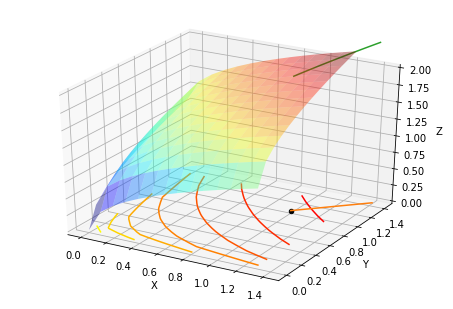

In [39]:
x = np.arange(0, 1.4, 0.1)
y = np.arange(0, 1.4, 0.1)
x,y=np.meshgrid(x,y)
f= np.sqrt(x)+np.sqrt(y)
plot3d(x,y,f)

From above picture, the value of $f(x,y)$ inscreases fastest along the (positive) gradient direction, which projection on the $X-Y$ plane is orthogonal to the level curves. 

Example
---
  Suppose that $f (x) = x^2 \sin (\pi y / 6)$.
**1.** The gradient of $f (x)$ at $(x, y) = (1, 1)$ is:

\begin{eqnarray*}
      \nabla f (1, 1) & = & (2 x \sin (\pi y / 6), \pi x^2 \cos (\pi y / 6) /
      6) |_{(x, y) = (1, 1)}\\
      & = & \left( 1, \frac{\sqrt{3} \pi}{12} \right)
    \end{eqnarray*}

**2.** The directional derivative at the direction, $\vec{u} = (1, 0)$, is:

\begin{eqnarray*}
      \nabla_{\vec{u}} f (1, 1) & = & \left( 1, \frac{\sqrt{3} \pi}{12}
      \right) \cdot (1, 0) = 1
    \end{eqnarray*}
**3.** The directional derivative at the direction, $\vec{v} = (1, 1)$, is:

\begin{eqnarray*}
      \vec{v} & \Rightarrow & (1, 1) / \sqrt{1^2 + 1^2} = \left(
      \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right)\\
      & \Downarrow & \\
      \nabla_{\vec{v}} f (1, 1) & = & \left( 1, \frac{\sqrt{3} \pi}{12}
      \right) \cdot \left( \frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}} \right) =
      \frac{1}{\sqrt{2}} + \frac{\sqrt{6} \pi}{24}
    \end{eqnarray*}
**4.** The maximum of the directional derivative is:

$$ \| \nabla f (1, 1)\| = \sqrt{1^2 + \left( \frac{\sqrt{3} \pi}{12}
       \right)^2} $$

and in the direction:

$$ \vec{e} = \nabla f (1, 1) / \| \nabla f (1, 1)\| $$

Exercise
---
  Suppose that $f (x, y) = 3 x^2 + 4 x y + 5 y^2$. Find the directional
  derivative of $f (x, y)$ at $(1, 1)$ in the directions 
  a) $\vec{e}_1 = (3, -4)$, b) $\vec{e}_2 = (1, 1)$. Find the direction at which the directional
  derivative attains its maximum.


In [20]:
f=3*x*x+4*x*y+5*y*y
df=grad(f,[x,y])
dfv=df_val(df,[1,1])
def df_dir(f,val):
    l=f[0]*val[0]+f[1]*val[1]
    return l/(sqrt(val[0]**2+val[1]**2))
df_dir(dfv,[3,-4])

-26/5

In [21]:
df_dir(dfv,[1,1])

12*sqrt(2)